# 2. Analysis data collected🔍

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_final = pd.read_csv('Datasets/fitbit/JLFN_fitbit_final.csv', index_col='Unnamed: 0', decimal='.')
#df_final.reset_index()
df_final.head()

,date,calories,steps,dist,floors,sedant,active_light,active_fair,active_very,active_cals,sleep_start_hr,sleep_minutesAsleep,sleep_minutesAwake,sleep_awakeningsCount,sleep_timeInBed,sleep_REM,sleep_light,sleep_deep,sleep_start,sleep_efficiency
0,2018-07-01,2825,12457,9.26,9,552,274,53,30,1540,1.13,493.0,38.0,1.0,531.0,NaN,NaN,NaN,01:08,93.0
1,2018-07-02,2305,5251,3.90,3,930,90,14,30,765,1.78,336.0,40.0,3.0,376.0,NaN,NaN,NaN,01:47,89.0
2,2018-07-03,2658,8430,6.30,18,1225,131,30,54,1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-04,2459,6781,5.04,18,845,166,12,22,966,1.20,322.0,73.0,22.0,395.0,58.0,171.0,93.0,01:12,82.0
4,2018-07-05,2725,6643,4.80,13,814,127,42,46,1246,1.10,365.0,46.0,33.0,411.0,81.0,212.0,72.0,01:06,89.0


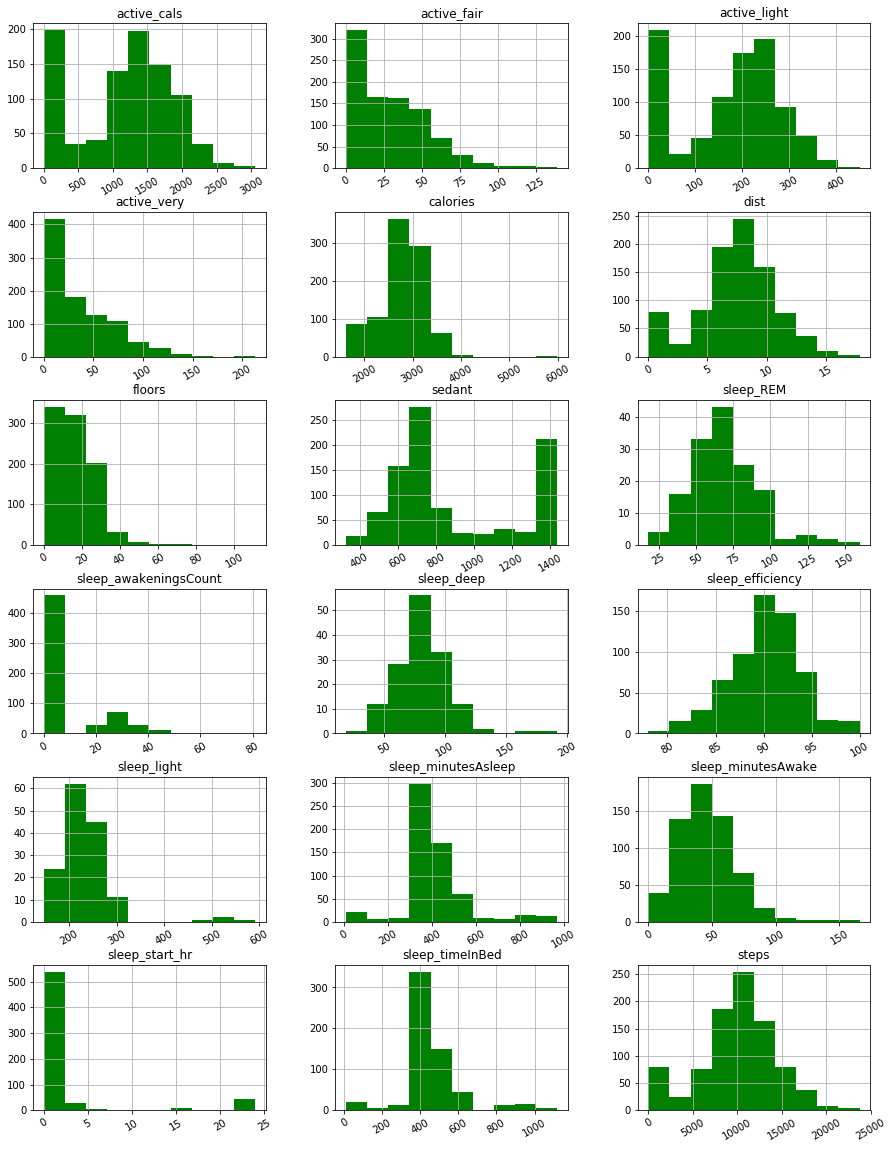

In [3]:
#Look data to see what I'm on my🤚
h = df_final.hist(figsize = (15,20), layout = (6,3), xrot = 30, color='g')

### Preliminary Observations
Based on these data histograms, some preliminary ideas can be:  
- Most of the days of medium or high activity show normal logarithmic or exponential distributions, while days with sedentary and slightly active show a distribution similar to normal.
- The average sedentary activity is about 10 hours but considering that many values of 1440 minutes that corresponds to 1 day are shown, I think that those days I did not have the band.
- The efficiency of my sleep is generally high (> 85%)
- On average, I sleep about 300-400 min (5-6,6 hours) of sleep each night.
- The data show that I am an average of about 40 minutes awake during sleep, that the truth is a higher figure than I would have thought. It assumes about 10% of the hours of sleep that from what I have looked at is more or less in the average of the population (I´m more relaxing!!)
- And although I unveil I stay in bed (average about 400 min)😏
- I get rid of quite a few times at night although I have a high number of 0 times awakened, which gives me the feeling that they are missing values. I'll have to check and verify that null values don't influence the final result.
- I walk an average of between 8,000-10,000 steps a day, which I find to be a little higher than the population average:  http://journals.lww.com/acsm-msse/Abstract/2010/10000/Pedometer_Measured_Physical_Activity_and_Health.4.aspx

In [4]:
#Note that the activity is '0' when the band hasn`t been used so are missing values
#En the case of 'sedant': Minutes of zero activity, when it is 1440 x 1day, means that the bands has not been used so
#en reality are also missing values.
#Change that value 1440 has value 'nan'
df_final['sedant']=df_final['sedant'].replace(1440,np.nan)
#According to the preliminary plots, a high percentage of the value '0' can also be observed in variables 
#that should have some number (even if it is minimal), if the bracelet accounted for any activity, 
#indicating that they are also missing values. I also change those '0' to 'Nan' values.
df_final[['active_light', 'active_fair', 'active_very', 'active_cals', 'sleep_awakeningsCount']] = df_final[['active_light', 'active_fair', 'active_very', 'active_cals', 'sleep_awakeningsCount']].replace(0,np.nan)
df_final

,date,calories,steps,dist,floors,sedant,active_light,active_fair,active_very,active_cals,sleep_start_hr,sleep_minutesAsleep,sleep_minutesAwake,sleep_awakeningsCount,sleep_timeInBed,sleep_REM,sleep_light,sleep_deep,sleep_start,sleep_efficiency
0,2018-07-01,2825,12457,9.26,9,552.0,274.0,53.0,30.0,1540.0,1.13,493.0,38.0,1.0,531.0,NaN,NaN,NaN,01:08,93.0
1,2018-07-02,2305,5251,3.90,3,930.0,90.0,14.0,30.0,765.0,1.78,336.0,40.0,3.0,376.0,NaN,NaN,NaN,01:47,89.0
2,2018-07-03,2658,8430,6.30,18,1225.0,131.0,30.0,54.0,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-04,2459,6781,5.04,18,845.0,166.0,12.0,22.0,966.0,1.20,322.0,73.0,22.0,395.0,58.0,171.0,93.0,01:12,82.0
4,2018-07-05,2725,6643,4.80,13,814.0,127.0,42.0,46.0,1246.0,1.10,365.0,46.0,33.0,411.0,81.0,212.0,72.0,01:06,89.0
5,2018-07-06,2639,8272,6.15,9,715.0,219.0,21.0,16.0,1204.0,1.40,413.0,56.0,29.0,469.0,65.0,223.0,59.0,01:24,87.0
6,2018-07-07,2545,9471,7.08,29,861.0,177.0,7.0,19.0,1013.0,1.57,358.0,17.0,NaN,376.0,NaN,NaN,NaN,01:34,95.0
7,2018-07-08,2363,6485,4.82,1,1146.0,184.0,27.0,1.0,940.0,15.90,80.0,2.0,NaN,82.0,NaN,NaN,NaN,15:54,98.0
8,2018-07-09,2727,9230,6.80,13,817.0,155.0,32.0,42.0,1260.0,1.10,334.0,60.0,24.0,394.0,68.0,168.0,98.0,01:06,85.0
9,2018-07-10,2958,10568,7.74,20,1166.0,182.0,29.0,63.0,1528.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_final.describe()

,calories,steps,dist,floors,sedant,active_light,active_fair,active_very,active_cals,sleep_start_hr,sleep_minutesAsleep,sleep_minutesAwake,sleep_awakeningsCount,sleep_timeInBed,sleep_REM,sleep_light,sleep_deep,sleep_efficiency
count,912.000000,912.000000,912.000000,912.000000,736.000000,718.000000,690.000000,685.000000,735.000000,632.000000,608.000000,608.000000,569.000000,608.000000,146.000000,146.000000,146.000000,632.000000
mean,2785.796053,9996.291667,7.426612,16.007675,766.217391,220.140669,37.124638,45.467153,1416.718367,3.045696,414.856908,45.718750,9.913884,462.055921,69.184932,234.349315,82.253425,90.117089
std,494.504571,4458.903555,3.329586,12.313458,236.627579,72.404555,22.879735,32.845877,501.925978,6.158307,140.408210,23.119734,13.001001,155.389960,23.063631,60.382755,22.045974,3.822391
min,1622.000000,0.000000,0.000000,0.000000,329.000000,1.000000,2.000000,1.000000,4.000000,0.020000,9.000000,0.000000,1.000000,10.000000,18.000000,146.000000,19.000000,78.000000
25%,2550.000000,7983.750000,5.920000,4.000000,618.750000,178.000000,19.000000,19.000000,1126.500000,0.630000,359.000000,31.000000,2.000000,404.000000,56.000000,202.000000,68.000000,87.000000
50%,2823.000000,10437.500000,7.700000,17.000000,715.000000,224.000000,34.000000,39.000000,1442.000000,0.950000,386.500000,44.000000,3.000000,430.000000,65.500000,223.000000,83.000000,90.000000
75%,3099.500000,12765.250000,9.535000,23.000000,804.000000,264.000000,50.000000,68.000000,1763.500000,1.655000,458.000000,57.000000,18.000000,506.250000,81.000000,251.000000,92.000000,93.000000
max,5994.000000,23763.000000,17.860000,111.000000,1439.000000,451.000000,139.000000,213.000000,3058.000000,23.980000,971.000000,166.000000,81.000000,1120.000000,160.000000,591.000000,192.000000,100.000000


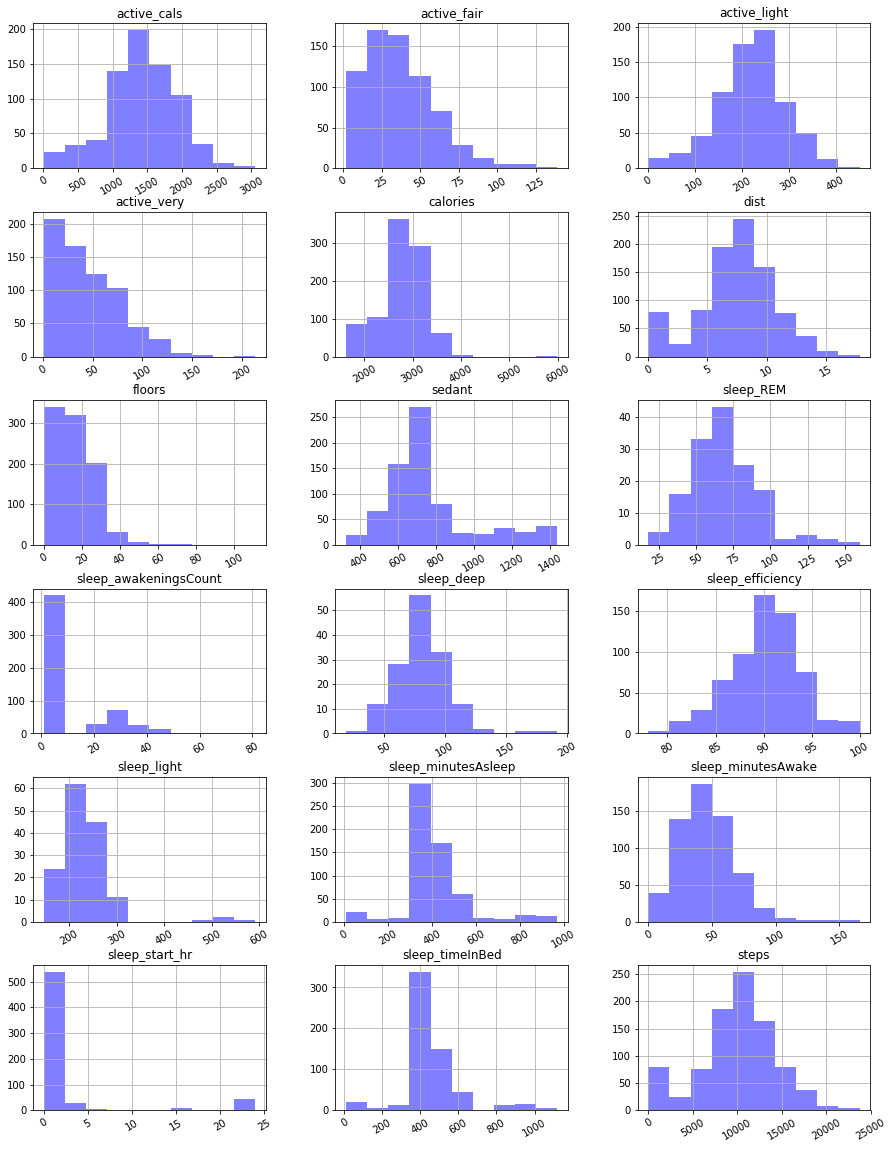

In [7]:
#Review the preliminary histograph charts to see the changes with the new 'nan' values.
h = df_final.hist(figsize = (15,20), layout = (6,3), xrot = 30, color='b', alpha=0.5)

With this data cleaning, I have managed to **homogenize the inconsistencies** of the charts in which they appeared as activity, records in which it is not expected to use the band.

## 2.1 Manage and extract other variables 🔬💻

In [5]:
#Extract new variables about the details of the week and month in the records.
df_final['weekday'] = df_final['date'].map(lambda x: (datetime.datetime.strptime(str(x),"%Y-%m-%d")).weekday() , na_action = 'ignore')
#df_final['day'] = df_final['date'].map(lambda x: (datetime.datetime.strptime(str(x),"%Y-%m-%d")).day , na_action = 'ignore')
df_final['month'] = df_final['date'].map(lambda x: (datetime.datetime.strptime(str(x),"%Y-%m-%d")).month , na_action = 'ignore')
df_final['year'] = df_final['date'].map(lambda x: (datetime.datetime.strptime(str(x),"%Y-%m-%d")).year , na_action = 'ignore')
df_final['month_year'] = df_final['month'].map(lambda x: str(x)) + '-' +df_final['year'].map(lambda x: str(x))
df_final.head()

,date,calories,steps,dist,floors,sedant,active_light,active_fair,active_very,active_cals,...,sleep_timeInBed,sleep_REM,sleep_light,sleep_deep,sleep_start,sleep_efficiency,weekday,month,year,month_year
0,2018-07-01,2825,12457,9.26,9,552.0,274.0,53.0,30.0,1540.0,...,531.0,NaN,NaN,NaN,01:08,93.0,6,7,2018,7-2018
1,2018-07-02,2305,5251,3.90,3,930.0,90.0,14.0,30.0,765.0,...,376.0,NaN,NaN,NaN,01:47,89.0,0,7,2018,7-2018
2,2018-07-03,2658,8430,6.30,18,1225.0,131.0,30.0,54.0,1200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,7,2018,7-2018
3,2018-07-04,2459,6781,5.04,18,845.0,166.0,12.0,22.0,966.0,...,395.0,58.0,171.0,93.0,01:12,82.0,2,7,2018,7-2018
4,2018-07-05,2725,6643,4.80,13,814.0,127.0,42.0,46.0,1246.0,...,411.0,81.0,212.0,72.0,01:06,89.0,3,7,2018,7-2018


In [6]:
#Extract % of bed time awake (related to sleep inefficiency)
df_final['sleep_minutes_awake_per'] = round(df_final['sleep_minutesAwake']/df_final['sleep_timeInBed']*100, 2)
df_final['sleep_minutes_awake_per'].head()

0     7.16
1    10.64
2      NaN
3    18.48
4    11.19
Name: sleep_minutes_awake_per, dtype: float64

In [7]:
#Calculate the time to wake up for each record/row
df_final['wake_hour'] = round(df_final['sleep_start_hr']+df_final['sleep_timeInBed']/60)
df_final['wake_hour'].head()

0    10.0
1     8.0
2     NaN
3     8.0
4     8.0
Name: wake_hour, dtype: float64

In [11]:
df_final['wake_hour'].unique()

array([10.,  8., nan,  9., 17.,  7., 11., 18., 16., 34., 25.,  6., 12.,
       15.,  3., 24., 14., 13., 19., 28., 20., 26.,  5., 21., 32., 33.])

## 2.2 Exploratory analysis of data 💉🔎

In [9]:
#Remodels a feature found to improve the visibility of upcoming charts. Reference: https://www.manishkurse.com/PythonProjects/PredictTitanicSurvivors.html
def prepare_plot_area(ax):
    #Remove the lines from the frame
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False) 
    
    # x e y with a mark on the bottom and left
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()  
    
#Define a color pattern that's nice
colrcode = [(31, 119, 180), (255, 127, 14),\
             (44, 160, 44), (214, 39, 40), \
             (148, 103, 189),  (140, 86, 75), \
             (227, 119, 194), (127, 127, 127), \
             (188, 189, 34), (23, 190, 207)]

for i in range(len(colrcode)):  
    r, g, b = colrcode[i]  
    colrcode[i] = (r / 255., g / 255., b / 255.)

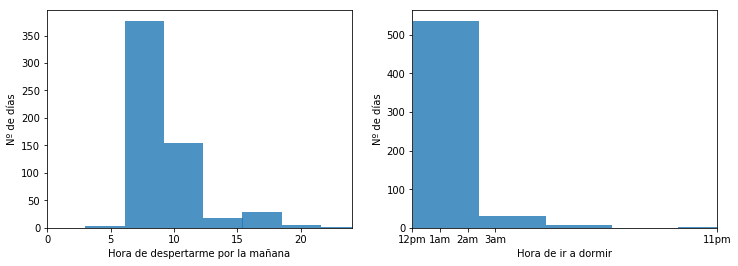

In [13]:
#Analyze in more detail the time of sleeping and waking up.
fig,axes = plt.subplots(figsize = (12,4),nrows = 1, ncols = 2)
plt.sca(axes[0])
df_final['wake_hour'].plot(kind = 'hist',color = colrcode[0], alpha = 0.8, xlim=[0, 24])
plt.xlabel('Hora de despertarme por la mañana')
plt.ylabel('Nº de días')

plt.sca(axes[1])
df_final['sleep_start_hr'].plot(kind = 'hist',color = colrcode[0], alpha = 0.8, xlim= [0, 5])
xt = plt.xticks([11,0,1,2,3],['11pm','12pm','1am','2am','3am'])
plt.xlabel('Hora de ir a dormir')
yy = plt.ylabel('Nº de días')

As you can appreciate I'm not especially early, I guess because I'm rather nocturnal and I usually go to bed late🙄

In [10]:
#Evolution of sleep hours per month in these nearly 3 years of measurement
sleep_evolution = df_final['sleep_minutesAsleep'].groupby(df_final['month_year'], sort=False).sum()
sleep_evolution.head()

month_year
7-2018    4456.0
6-2018    3942.0
5-2018    3787.0
4-2018    6113.0
3-2018    6910.0
Name: sleep_minutesAsleep, dtype: float64

Text(0,0.5,'Horas de sueño al mes')

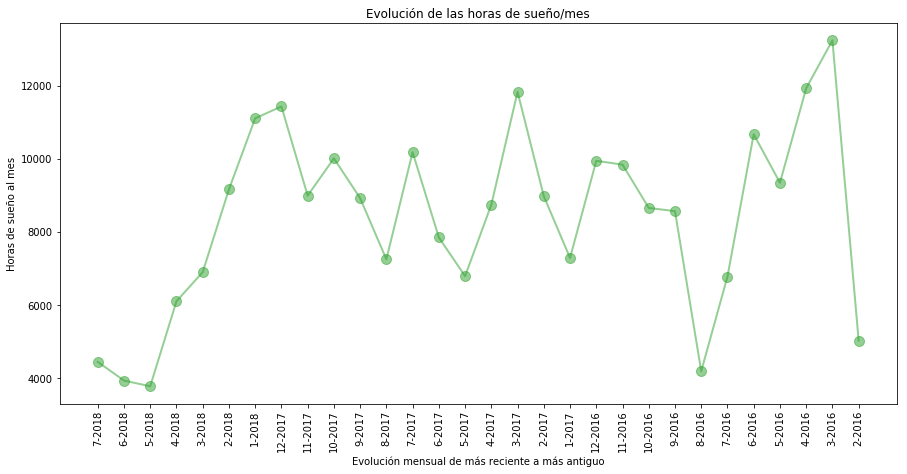

In [17]:
#List with labels for x-axis
list_MA = sleep_evolution.index.tolist()
fig, ax = plt.subplots(figsize=(15,7))
sleep_evolution.plot(ax=ax, kind = 'line',color = colrcode[2], alpha = 0.5,linewidth = 2, marker = 'o',markersize = 10)
plt.title('Evolución de las horas de sueño/mes')
plt.xticks(list(range(len(list_MA))),list_MA, rotation='vertical')
plt.xlabel('Evolución mensual de más reciente a más antiguo')
plt.ylabel('Horas de sueño al mes')

I was hoping to find a clearer pattern of hours of sleep😴.  
There is usually a decrease in sleep hours in summers , but in 2017 you don't see that pattern.

### 2.2.1 Weeks Analysis

#### Explore variations based on days of the week 📅

In [11]:
#Extract a series of pooled data that facilitates the aggregated analysis by weeks
#Calculate the average number of steps I take per day of the week
weekday_stps = df_final['steps'].groupby(df_final['weekday']).median()
#Calculate the hours I get on average per day of the week
sleep_minutes_asleep_med = df_final['sleep_minutesAsleep'].groupby(df_final['weekday']).median()/60
#Try to calculate the efficiency of my sleep based on the days of the week
sl_eff = (1-df_final['sleep_minutesAsleep']/df_final['sleep_timeInBed'])*100
sl = sl_eff.groupby(df_final['weekday']).median()
#How many times do I wake up on average throughout the week?
wak = df_final['sleep_awakeningsCount'].groupby(df_final['weekday']).median()
#How much time on average do I stay in bed depending on the days of the week?
sl_minutes_inbed = df_final['sleep_timeInBed'].groupby(df_final['weekday']).median()
#Percentages of minutes awake during sleep depending on the days of the week
awkmin_per = df_final['sleep_minutes_awake_per'].groupby(df_final['weekday']).median()

#### According to these new parameters grouped by day of the week, I view them on graphics 📉

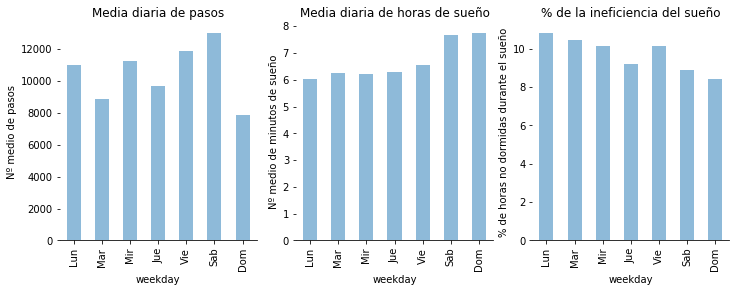

In [19]:
fig,axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)

#Average number of steps
ct = 0
plt.sca(axes[ct])
weekday_stps.plot(kind = 'bar',color = colrcode[0], alpha = 0.5)
plt.ylabel('Nº medio de pasos')
plt.title('Media diaria de pasos')
plt.xticks(list(range(7)),['Lun','Mar','Mir','Jue','Vie','Sab','Dom'])
prepare_plot_area(axes[ct])

#Average number of minutes sleeping
ct +=1
plt.sca(axes[ct])
sleep_minutes_asleep_med.plot(kind = 'bar',color = colrcode[0], alpha = 0.5)
plt.ylabel('Nº medio de minutos de sueño')
plt.title('Media diaria de horas de sueño')
plt.xticks(list(range(7)),['Lun','Mar','Mir','Jue','Vie','Sab','Dom'])
prepare_plot_area(axes[ct])

#Sleep inefficiency
ct +=1
plt.sca(axes[ct])
sl.plot(kind = 'bar',color = colrcode[0], alpha = 0.5)
plt.ylabel('% de horas no dormidas durante el sueño')
plt.title('% de la ineficiencia del sueño')
plt.xticks(list(range(7)),['Lun','Mar','Mir','Jue','Vie','Sab','Dom'])
prepare_plot_area(axes[ct])

Some **conclusios**:  
- The average of steps is close to 10,000 steps🏃‍, although Mondays, Wednesdays, Fridays and Saturdays are above and being in upward progression. It coincides with the days I do sport (gym and football on Saturdays), so it makes sense.👏👏
- As expected on weekends I sleep two more hours on average. I don´t the goal expected about 8 hours of sleep daily.😴
- I'm gaining sleep efficiency as the week progresses. Monday is the least efficient day🙈.

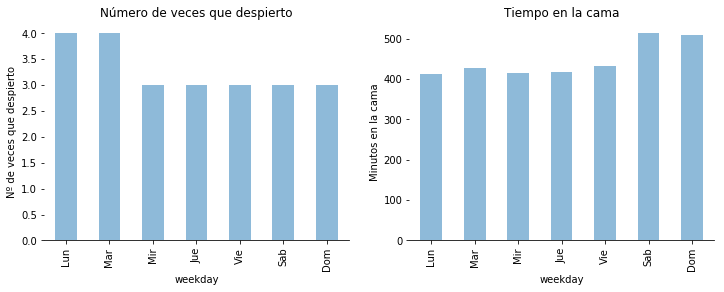

In [20]:
fig,axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)

#Average the times I wake up during the week
ct =0
plt.sca(axes[ct])
wak.plot(kind = 'bar',color = colrcode[0], alpha = 0.5)
plt.ylabel('Nº de veces que despierto')
plt.title('Número de veces que despierto')
plt.xticks(list(range(7)),['Lun','Mar','Mir','Jue','Vie','Sab','Dom'])
prepare_plot_area(axes[ct])

#Bed time
ct += 1
plt.sca(axes[ct])
sl_minutes_inbed.plot(kind = 'bar',color = colrcode[0], alpha = 0.5)
plt.ylabel('Minutos en la cama')
plt.title('Tiempo en la cama')
plt.xticks(list(range(7)),['Lun','Mar','Mir','Jue','Vie','Sab','Dom'])
prepare_plot_area(axes[ct])

Some **conclusions**:
- In keeping with the charts and data above, what Monday and Tuesday are the days I wake up most times.  
- It's not a great revelation, they won´t give me the novel prize for this🥇, but the weekend I can take more in bed😯.

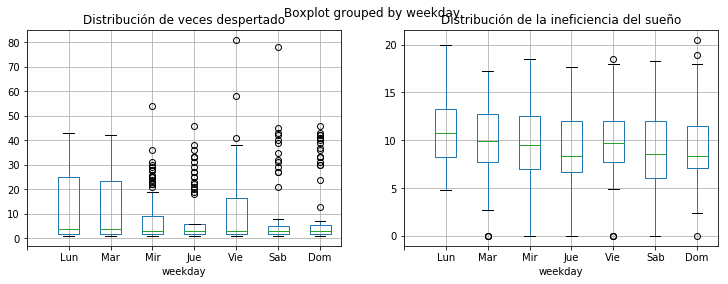

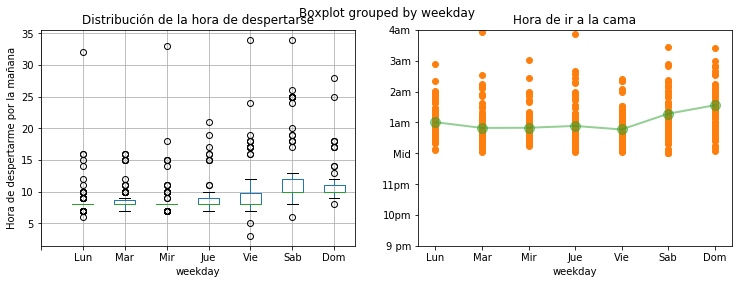

In [22]:
#Distribution of the data set
#Distribution of the number of times I wake up
fig,axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)
plt.sca(axes[0])
d = df_final.boxplot(column='sleep_awakeningsCount', by='weekday', ax =axes[0])
d = plt.xticks(list(range(8)),['', 'Lun','Mar','Mir','Jue','Vie','Sab','Dom'])
plt.title('Distribución de veces despertado')

#Inefficiency of sleep
plt.sca(axes[1])
d = df_final.boxplot(column='sleep_minutes_awake_per', by='weekday', ax =axes[1])
d = plt.xticks(list(range(8)),['', 'Lun','Mar','Mir','Jue','Vie','Sab','Dom'])
plt.title('Distribución de la ineficiencia del sueño')

#Distribution of wake-up time
fig,axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)
plt.sca(axes[0])
h = df_final.boxplot(column= 'wake_hour', by = 'weekday', ax = axes[0])
h = plt.xticks(list(range(8)),['', 'Lun','Mar','Mir','Jue','Vie','Sab','Dom'])
h = plt.ylabel('Hora de despertarme por la mañana')
h = plt.title('Distribución de la hora de despertarse')

#Distribution of bedtime
sl_hr = df_final['sleep_start_hr'].groupby(df_final['weekday']).median()+12
plt.sca(axes[1])
sl_hr.plot(kind = 'line',color = colrcode[2],alpha = 0.5,linewidth = 2, marker = 'o',markersize = 10, ylim=[10, 15])
d = plt.xticks(list(range(8)),['Lun','Mar','Mir','Jue','Vie','Sab','Dom'])
d = plt.yticks(np.linspace(9,16,8),['9 pm','10pm','11pm','Mid','1am','2am','3am','4am'])
plt.scatter(df_final['weekday'],df_final['sleep_start_hr']+12, color = colrcode[1])
plt.title('Hora de ir a la cama')


plt.ylim = (9,15)

Algunas **conclusiones**:  
- Aunque el número medio de veces que me despierto es entorno a 3 o 4 veces, pero se aprecia una alta variabilidad sobre todo los lunes, martes y viernes. Llegando ocasiones a despertarme más de 20 veces😫.
- La distribución de la ineficiencia del sueño sigue una distribución más regular.
- En general la hora de despertar siempre se concentra entre las 7 y las 10 am.
- La hora de ir a la cama esta siempre muy próxima a la 1 am.

#### Algunas otras observaciones: 
- De media, me despierto entre las 7 y 8 de la mañana entre semana y me hagarro a la cama los fines de semana hasta las 10am.
- Me suelo dormir sobre la 1am, lo que me sorprende por que a las 12-12:30 suelo ir a la cama, pero es verdad que siempre hay algo que leer o ver en netflix.
- La ineficiencia de mi sueño (minutos despierto frente al tiempo en la cama) es mayor los lunes y los martes, lo cual es curioso pero posiblemente explicable porque vengo de dormir más el fin de semana y puedo estar más intranquilo por el inicio de la semana de trabajo. Lo que es más curioso es que los viernes también es de los más ineficientes en este sentido.
- Parece que hay mucha variabilidad en las veces que me despierto por la noche. La media son 3-4 pero hay épocas que llegan a 20 veces. Puede ser respuesta a epocas de especial nervios o quizás que tengo dos niños pequeños y a veces estan malos.

### 2.2.2 Month Analysis

### Looking at the variations through the months

Text(0.5,1,'Media de escaleras/pisos según meses')

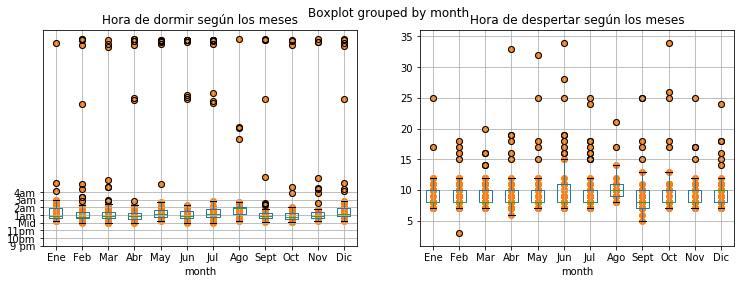

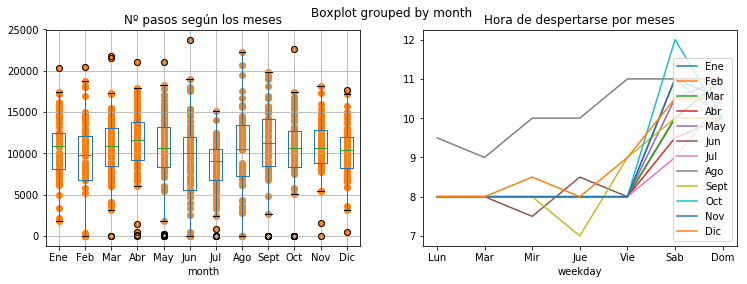

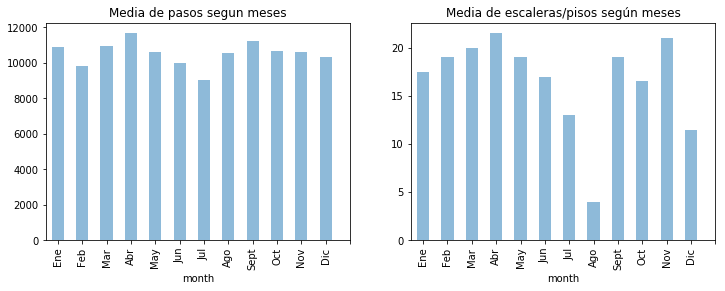

In [23]:
sl_st_mon = df_final['sleep_start_hr'].groupby(df_final['month']).median()
fig,axes = plt.subplots(figsize = (12,4), nrows = 1, ncols = 2)
plt.sca(axes[0])
s = plt.scatter(df_final['month'],df_final['sleep_start_hr'], color = colrcode[1])#Take off df_final['month']-1
d = df_final.boxplot(column='sleep_start_hr', by='month', ax =axes[0])# showfliers=False)
d = plt.xticks(np.linspace(1,12,12),['Ene','Feb','Mar','Abr','May','Jun','Jul', 'Ago', 'Sept', 'Oct', 'Nov', 'Dic'])
d = plt.yticks(np.linspace(-3,4,8),['9 pm','10pm','11pm','Mid','1am','2am','3am','4am'])
plt.title('Hora de dormir según los meses')

plt.sca(axes[1])
d = df_final.boxplot(column='wake_hour', by='month', ax =axes[1])
s = plt.scatter(df_final['month'],df_final['wake_hour'], color = colrcode[1])#Take off df_final['month']-1
d = plt.xticks(np.linspace(1,12,12),['Ene','Feb','Mar','Abr','May','Jun','Jul', 'Ago', 'Sept', 'Oct', 'Nov', 'Dic'])
plt.title('Hora de despertar según los meses')
#plt.ylim(0, 24)

st_mon = df_final['steps'].groupby(df_final['month']).median()
fig,axes = plt.subplots(figsize = (12,4), nrows = 1, ncols = 2)
plt.sca(axes[0])
plt.scatter(df_final['month'],df_final['steps'], color = colrcode[1])#Take off df_final['month']-1
d = df_final.boxplot(column='steps', by='month', ax =axes[0])
d = plt.xticks(np.linspace(1,12,12),['Ene','Feb','Mar','Abr','May','Jun','Jul', 'Ago', 'Sept', 'Oct', 'Nov', 'Dic'])
plt.title('Nº pasos según los meses')

plt.sca(axes[1])
d = df_final.groupby(['month','weekday'])['wake_hour'].median()
months = ['Ene','Feb','Mar','Abr','May','Jun','Jul', 'Ago', 'Sept', 'Oct', 'Nov', 'Dic']
for i in range(1,13):
    d[i].plot(kind = 'line',label = months[i-1])
h = plt.legend(loc='lower right')
d = plt.xticks(list(range(7)),['Lun','Mar','Mir','Jue','Vie','Sab','Dom'])
plt.title('Hora de despertarse por meses')

fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(121)
st_mon.plot(kind = 'bar', alpha = 0.5, color = colrcode[0])
d = plt.xticks(np.linspace(0,12,13),['Ene','Feb','Mar','Abr','May','Jun','Jul', 'Ago', 'Sept', 'Oct', 'Nov', 'Dic'])
plt.title('Media de pasos segun meses')

el_mon = df_final['floors'].groupby(df_final['month']).median()
ax2 = fig.add_subplot(122)
el_mon.plot(kind = 'bar', alpha = 0.5, color = colrcode[0])
d = plt.xticks(np.linspace(0,12,13),['Ene','Feb','Mar','Abr','May','Jun','Jul', 'Ago', 'Sept', 'Oct', 'Nov', 'Dic'])
plt.title('Media de escaleras/pisos según meses')

Some **conclusions**:  
- There is not much variation in the onset of sleep and the time to wake up between the different months.  
- It is appreciated that the summer months and close to Christmas, the bedtime is slightly delayed.  
- The spring and fall months are the ones that do the most physical activity (steps). You can see I like the moderate 🌞.  
- The month of July is the one that significantly decreased the steps, I suppose at this point I take public transport more often (by air conditioning?). The month of April is the one that i do the most.
- I have an average of between 10 and 15 upsand swirlo up in the year, but the decline in August is significant. Coincides in a holiday season, where the beach and village there are fewer stairs and the general activity is reduced.

### 2.3 Variables correlations

C:\Users\JoseLuisFernandez\Anaconda3\envs\Master_UAH_Python\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JoseLuisFernandez\Anaconda3\envs\Master_UAH_Python\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


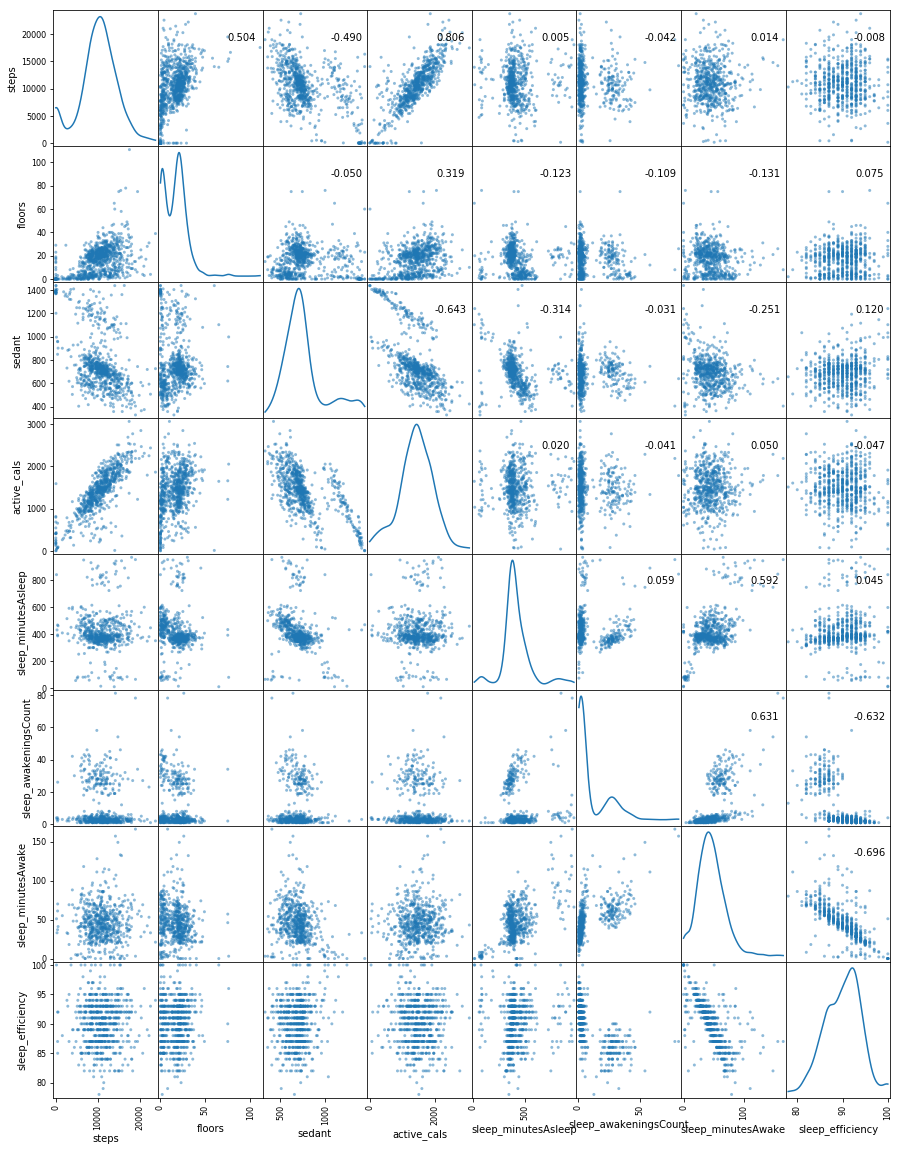

In [24]:
df_corr = df_final[['steps','floors','sedant','active_cals','sleep_minutesAsleep','sleep_awakeningsCount',\
                     'sleep_minutesAwake','sleep_efficiency']]
 
axes = pd.scatter_matrix(df_corr, figsize = (15,20), alpha=0.5, diagonal='kde')

correlacion = df_corr.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %correlacion[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

**Observations of the correlation matrix:**
- How to expect there is a correlation between steps, sedentary activity and calorie expenditure per activity and between the times I wake up with awake minutes to sleep over.
- It is seen a little less correlation but it is linear between the number of steps and the climbing stairs.

(-3, 10)

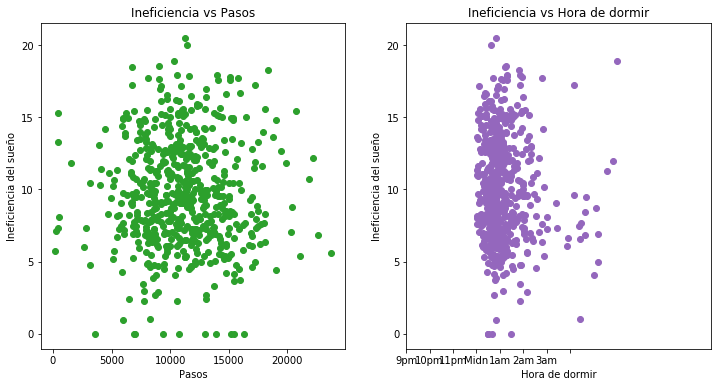

In [25]:
#We check in more detail some correlations that might be interesting
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(121)
ax.scatter(df_final['steps'],df_final['sleep_minutes_awake_per'],color = colrcode[2])
plt.xlabel('Pasos')
plt.ylabel('Ineficiencia del sueño')
plt.title('Ineficiencia vs Pasos')

ax2 = fig.add_subplot(122)
ax2.scatter(df_final['sleep_start_hr'],df_final['sleep_minutes_awake_per'],color = colrcode[4])
plt.xlabel('Hora de dormir')
plt.title('Ineficiencia vs Hora de dormir')
p = plt.ylabel('Ineficiencia del sueño')
xt = plt.xticks(np.linspace(-3,4,8),['9pm','10pm','11pm','Midn','1am','2am','3am'])
plt.xlim(-3, 10)

**Observations**:  
Trying to find a correlation with each other, steps influence sleep. May be a pattern.

### 2.4 Tendencia en los datos

Text(0,0.5,'Hora de despertar(am)')

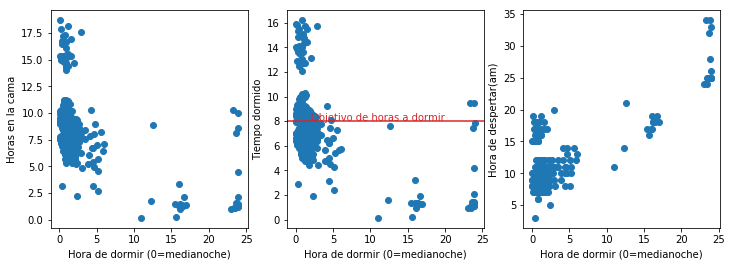

In [26]:
#Looking at the trend in data

fig,axes = plt.subplots(figsize = (12,4), nrows = 1, ncols = 3)
plt.sca(axes[0])
h = plt.scatter(df_final['sleep_start_hr'],df_final['sleep_timeInBed']/60,color = colrcode[0])
plt.xlabel('Hora de dormir (0=medianoche)')
plt.ylabel('Horas en la cama')

plt.sca(axes[1])
h = plt.scatter(df_final['sleep_start_hr'],df_final['sleep_minutesAsleep']/60,color = colrcode[0])
plt.xlabel('Hora de dormir (0=medianoche)')
plt.ylabel('Tiempo dormido')
plt.axhline(y=8,color = colrcode[3])
plt.text(2,8,'Objetivo de horas a dormir',color = colrcode[3])

plt.sca(axes[2])
h = plt.scatter(df_final['sleep_start_hr'],df_final['wake_hour'],color = colrcode[0])
plt.xlabel('Hora de dormir (0=medianoche)')
plt.ylabel('Hora de despertar(am)')

**Observations**:  
- It is appreciated that the sooner I go to bed, the more hours I usually sleep.
- There is a smaller group of data that raises the average of hours of sleep and coincides the days I have completed with a siesta. I thought they were less naps🙄. I don't show this to my wife.🙈
- Overall I have not managed to meet my goal of sleeping at least 8 hours a day, although I have fulfilled more than I thought.

#### Focus on physical activity

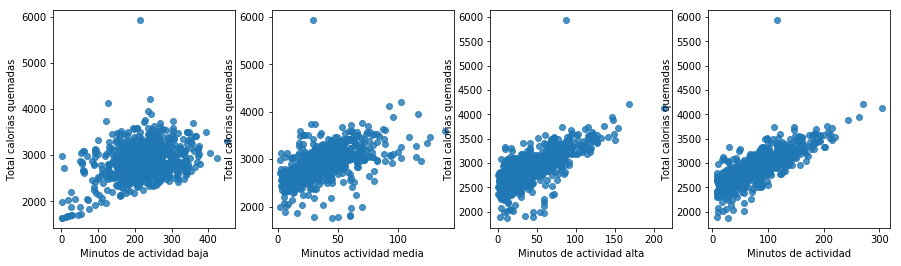

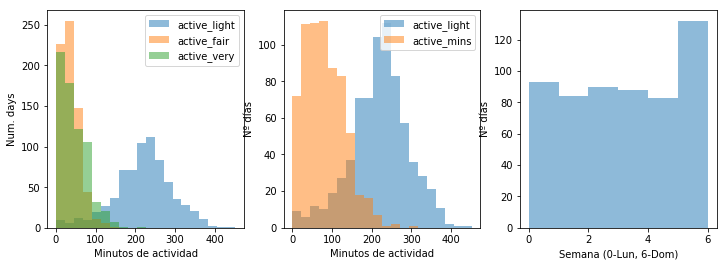

In [28]:
df_final['active_mins'] = df_final['active_very'] + df_final['active_fair']

fig,axes = plt.subplots(figsize = (15,4), nrows = 1, ncols = 4)
plt.sca(axes[0])
plt.scatter(df_final['active_light'],df_final['calories'],color = colrcode[0], alpha = 0.8)
plt.xlabel('Minutos de actividad baja')
plt.ylabel('Total calorias quemadas')
plt.sca(axes[1])
plt.scatter(df_final['active_fair'],df_final['calories'],color = colrcode[0], alpha = 0.8)
plt.xlabel('Minutos actividad media')
plt.ylabel('Total calorias quemadas')

plt.sca(axes[2])
p = plt.scatter(df_final['active_very'],df_final['calories'],color = colrcode[0], alpha = 0.8)
plt.xlabel('Minutos de actividad alta')
plt.ylabel('Total calorias quemadas')

plt.sca(axes[3])
p = plt.scatter(df_final['active_mins'],df_final['calories'],color = colrcode[0], alpha = 0.8)
plt.xlabel('Minutos de actividad')
plt.ylabel('Total calorias quemadas')

fig,axes = plt.subplots(figsize = (12,4), nrows = 1, ncols = 3)
plt.sca(axes[0])
df_final[['active_light','active_fair','active_very']].plot(kind = 'hist',ax = axes[0],alpha = 0.5, bins = 20)
plt.xlabel('Minutos de actividad')
plt.ylabel('Num. days')

plt.sca(axes[1])
df_final[['active_light','active_mins']].plot(kind = 'hist', ax = axes[1], alpha = 0.5, bins = 20)
plt.xlabel('Minutos de actividad')
plt.ylabel('Nº días')

plt.sca(axes[2])
df_final[df_final['active_mins']>30.0]['weekday'].plot(kind = 'hist', ax = axes[2], alpha = 0.5, bins = 6)
plt.xlabel('Semana (0-Lun, 6-Dom)')
lb = plt.ylabel('Nº días')

**Observations**:  
- The upper scatter plots show that my total calories come mainly from a light activity. It's clear that more minutes of activity, more energy expenditure. However, with many fewer minutes of medium or intense activity I get the same average energy expenditure.  
- As for the activity, I think it is not entirely bad the numbers of days of medium and intense activity, compared to those of mild activity although (as is normal) I accumulate more minutes of soft activity.
- It is appreciated that total activity does not overlap too much with light activity, which presupposes a good contribution of medium and intense activity.
- Towards the end of the week I accumulate greater days of activity. On weekends I take advantage of sports.    

Well,... I thought it was going to be worse🤗😜